In [2]:
import numpy as np
X= np.array([[0,1], [1,0]])
print("XX^dagger")
print(X @ X.T.conj())
print("X^daggerX")
print(X.T.conj() @ X)

XX^dagger
[[1 0]
 [0 1]]
X^daggerX
[[1 0]
 [0 1]]


In [3]:
print("The norm of the state |0> before applying X")
zero_ket = np.array([[1], [0]])
print(np.linalg.norm(zero_ket))

The norm of the state |0> before applying X
1.0


In [4]:
print("The norm of the state |0> after applying X")
print(np.linalg.norm(X @ zero_ket))

The norm of the state |0> after applying X
1.0


In [7]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import circuit_drawer
np.set_printoptions(precision=3, suppress = True)
backend_statevector = Aer.get_backend('statevector_simulator')
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)

In [9]:
circuit.x(q[0])
circuit.x(q[0])
job = execute(circuit, backend_statevector)
print(job.result().get_statevector(circuit))


[0.+0.j 1.+0.j]


In [10]:
def mixed_state(pure_state, visibility):
    density_matrix = pure_state @ pure_state.T.conj()
    maximally_mixed_state = np.eye(4)/2**2
    return visibility*density_matrix + (1-visibility)*maximally_mixed_state
ϕ = np.array([[1], [0], [0], [1]])
print("maximum visibility is a pure state:")
print(mixed_state(ϕ, 1.0))

maximum visibility is a pure state:
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]


In [11]:
print("The state is still entangled with visibility 0.8:")
print(mixed_state(ϕ, 0.8))

The state is still entangled with visibility 0.8:
[[0.85 0.   0.   0.8 ]
 [0.   0.05 0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.8  0.   0.   0.85]]


In [12]:
print("entangkement is lost by 0.6:")
print(mixed_state(ϕ, 0.6))

entangkement is lost by 0.6:
[[0.7 0.  0.  0.6]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.6 0.  0.  0.7]]


In [13]:
print("Barely any coherence remain by 0.2")
print(mixed_state(ϕ, 0.2))

Barely any coherence remain by 0.2
[[0.4 0.  0.  0.2]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.2 0.  0.  0.4]]


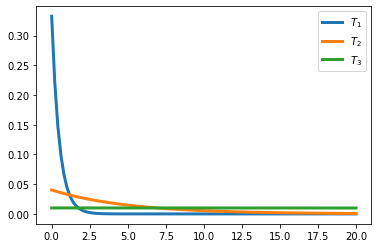

In [21]:
import matplotlib.pyplot as plt
temperatures = [0.5, 5, 2000]
energies = np.linspace(0,20,100)
fig, ax = plt.subplots()
for i, T in enumerate(temperatures):
    probabilities = np.exp(-energies/T)
    z = probabilities.sum()
    probabilities /=z
    ax.plot(energies, probabilities, linewidth = 3, label= "$T_" + str(i+1)+"$")
#ax.set_xlim(0, 20)
#ax.set_ylim(0, 1.2*probabilities.max())
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_xlabel('energy')
#ax.set_ylabel('probability')
ax.legend()